In [19]:
from anpr.generic.filter_mean import FilterMean
from anpr.generic.filter_bilateral import FilterBilateral
from anpr.generic.filter_median import FilterMedian
from anpr.generic.filter_nlm import FilterNLM
from anpr.generic.grayscale import GrayScale
from anpr.generic.canny import Canny
from anpr.datasets.open_alpr import OpenALPRDataset
import numpy as np
import imutils

import cv2

from matplotlib import pyplot as plt

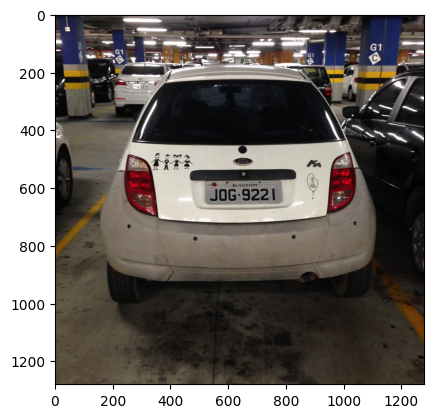

In [20]:
ds = OpenALPRDataset()
img = ds.image_at(20).image
plt.imshow(img)

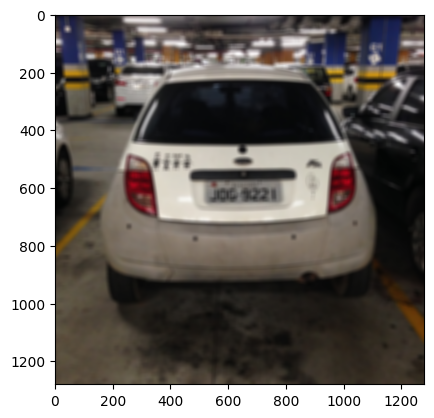

In [21]:
mean_filter = FilterMean(17)
plt.imshow(mean_filter.process(img))

In [22]:
""" bilateral_filter = FilterBilateral(47)
plt.imshow(bilateral_filter.process(img, 75, 75)) """

' bilateral_filter = FilterBilateral(47)\nplt.imshow(bilateral_filter.process(img, 75, 75)) '

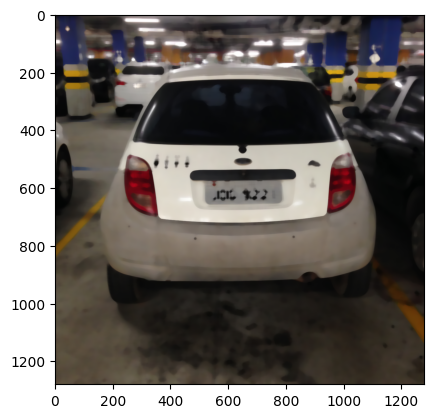

In [23]:
median_filter = FilterMedian(17)
plt.imshow(median_filter.process(img))


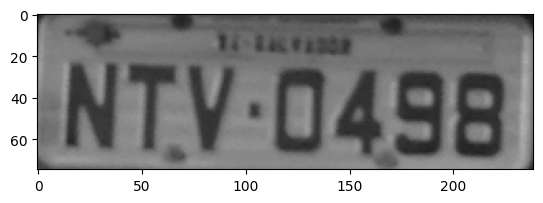

In [47]:
img = ds.image_at(40).image
grayscale = GrayScale()
gray  = grayscale.process(img)


bilateral = FilterBilateral(11, 17, 17)
bilateral = bilateral.process(gray)


# Detecção de bordas usando Canny
edges = Canny(30, 200)
edges = edges.process(bilateral)


keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


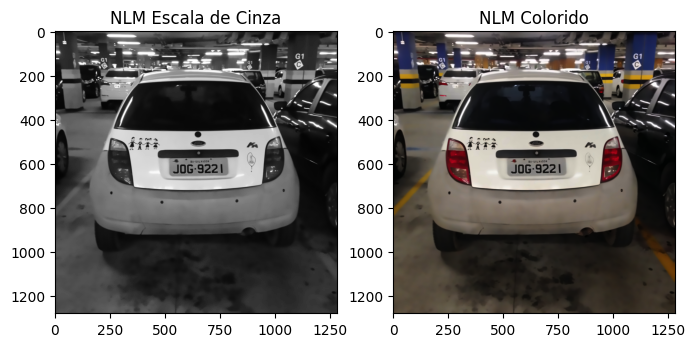

In [ ]:
imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

nlm_filter_gray = FilterNLM(h=17)
nlm_filter_color = FilterNLM(h=17, hForColorComponents=10)

fig, axs = plt.subplots(1, 2,
                        figsize=(8, 8),
                        facecolor='w',
                        edgecolor='k')

axs[0].set_title('NLM Escala de Cinza')
axs[0].imshow(nlm_filter_gray.process(imggray), cmap='gray')

axs[1].set_title('NLM Colorido')
axs[1].imshow(nlm_filter_color.process(img))